# Planet Classroom Content: An Analysis

Having only reached the YouTube Partner Program at the start of 2023, the team at Planet Classroom (including myself) is interested in looking at the highest earning videos since becoming monetized. We would like to gather some data to determine which videos should have more promotion to help generate more revenue. Along with current highest-earning videos, we'll want to look at other variables, like impressions and click-through rate, that could turn videos into high-earners.

This analysis will provide a more detailed look into which content Planet Classroom should be promoting while still curating and publishing new content for our audience. In turn, we will be able to create a more effective promotional and marketing strategy resulting in higher revenue.

*The dataset used in the beginning of this analysis reflects channel analytics from January 2023 through May 2023. January 2023 is when the channel was officially accepted and verified into the YouTube Partner Program. Lifetime data will reflect higher views and different view durations than what is reflected in this dataset. The lifetime dataset will be looked at midway through this analysis to get a better understanding of content performance since its creation and what that means relative to current data.*

# Importing Libraries & Data
First we'll begin by importing the necessary libaries for our analysis as well as the dataset itself.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for deprecation warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r".\resources\janmay2023.csv")

# Exploring & Cleaning the Dataset
Let's begin by getting an idea of the dataset that we're working with. We'll check the shape of the data and then take care of any null values and do some cleanup along the way to get our data prepared for any graphing or deeper analysis we might want to do.

In [3]:
df

,Video title,Views,Average view duration,Ad impressions,Impressions,Impressions click-through rate (%),CPM (USD),RPM (USD),Estimated revenue (USD)
0,Total:,131703.0,0:01:05,40230,394930,2.24,1.431,0.242,31.901
1,How Will the Metaverse Change the Way We Live ...,15355.0,0:00:18,11269,11108,0.41,0.530,0.214,3.287
2,Appalachian Spring,4952.0,0:07:00,0,8757,0.87,NaN,0.000,0.000
3,Steps in the Street,3407.0,0:02:39,2882,30022,5.13,5.366,2.526,8.607
4,Ascent,2576.0,0:00:49,214,10487,2.61,2.379,0.113,0.292
...,...,...,...,...,...,...,...,...,...
352,Inner Me,0.0,NaN,0,0,NaN,NaN,NaN,0.000
353,Through the Wall,0.0,NaN,0,0,NaN,NaN,NaN,0.000
354,SIROUN Webcast: The Armenian Genocide & Tolera...,0.0,NaN,0,67,0.00,NaN,NaN,0.000
355,Throw,0.0,NaN,0,0,NaN,NaN,NaN,0.000


In [4]:
df.shape

(357, 9)

This dataset currently includes 357 records. Each record is a Planet Classroom video with one record denoted as a 'Total' record. Before we jump in let's change the column headers to lowercase with no spacing for convenience.

In [5]:
# changing the column headers and adjusting for spacing
df.columns = df.columns.str.lower()

In [6]:
df.columns

Index(['video title', 'views', 'average view duration', 'ad impressions',
       'impressions', 'impressions click-through rate (%)', 'cpm (usd)',
       'rpm (usd)', 'estimated revenue (usd)'],
      dtype='object')

In [7]:
# renaming the columns
df.rename(columns={'video title':'video_title', 
                   'average view duration':'avg_view_duration', 
                   'ad impressions':'ad_impressions', 
                   'impressions click-through rate (%)':'impressions_ctr', 
                   'cpm (usd)':'cpm_usd',
                   'rpm (usd)':'rpm_usd', 
                   'estimated revenue (usd)':'est_revenue_usd'}, inplace=True)

In [8]:
df

,video_title,views,avg_view_duration,ad_impressions,impressions,impressions_ctr,cpm_usd,rpm_usd,est_revenue_usd
0,Total:,131703.0,0:01:05,40230,394930,2.24,1.431,0.242,31.901
1,How Will the Metaverse Change the Way We Live ...,15355.0,0:00:18,11269,11108,0.41,0.530,0.214,3.287
2,Appalachian Spring,4952.0,0:07:00,0,8757,0.87,NaN,0.000,0.000
3,Steps in the Street,3407.0,0:02:39,2882,30022,5.13,5.366,2.526,8.607
4,Ascent,2576.0,0:00:49,214,10487,2.61,2.379,0.113,0.292
...,...,...,...,...,...,...,...,...,...
352,Inner Me,0.0,NaN,0,0,NaN,NaN,NaN,0.000
353,Through the Wall,0.0,NaN,0,0,NaN,NaN,NaN,0.000
354,SIROUN Webcast: The Armenian Genocide & Tolera...,0.0,NaN,0,67,0.00,NaN,NaN,0.000
355,Throw,0.0,NaN,0,0,NaN,NaN,NaN,0.000


Now let's check how many null values there are.

In [9]:
# checking for null values
df.isna().sum()

video_title            0
views                  1
avg_view_duration     26
ad_impressions         0
impressions            0
impressions_ctr       15
cpm_usd              152
rpm_usd               27
est_revenue_usd        0
dtype: int64

As the Content Analyst for Planet Classroom, I know that the null values within this dataset are largely due to advertisers not paying to advertise on specific videos for one reason or another. We can see this in the 'cpm_usd' column. CPM stands for 'cost per mile' which is the cost per thousand impressions on the video before accounting for YouTube's share. It is essentially the cost an advertiser will pay for every 1,000 impressions their ad receives on YouTube. Conversely, 'rpm_usd' is reflective of the revenue earned per 1,000 views (revenue per mile). With this in mind we will go ahead and drop the null values within our dataset which largely reflects content that is not earning revenue to begin with, usually for copyright reasons or the publishing contract has ended.

In [10]:
# dropping null values from the dataset
df = df.dropna()
df

,video_title,views,avg_view_duration,ad_impressions,impressions,impressions_ctr,cpm_usd,rpm_usd,est_revenue_usd
0,Total:,131703.0,0:01:05,40230,394930,2.24,1.431,0.242,31.901
1,How Will the Metaverse Change the Way We Live ...,15355.0,0:00:18,11269,11108,0.41,0.530,0.214,3.287
3,Steps in the Street,3407.0,0:02:39,2882,30022,5.13,5.366,2.526,8.607
4,Ascent,2576.0,0:00:49,214,10487,2.61,2.379,0.113,0.292
6,Desa Timun (The Cucumber Village),2367.0,0:00:55,224,2312,6.70,1.188,0.067,0.158
...,...,...,...,...,...,...,...,...,...
317,The Full Stop,1.0,0:00:07,3,43,2.33,5.333,9.000,0.009
318,Toxic Pollution,1.0,0:00:16,2,67,0.00,0.000,0.000,0.000
324,Buried Treasure and No Spade,1.0,0:00:00,1,64,0.00,3.000,2.000,0.002
325,Technology is Fire,1.0,0:00:59,2,42,2.38,0.500,1.000,0.001


Next we'll remove index zero and then reset the index so as not to distort the data. After that we'll check the data types before moving on to a deeper analysis just to be sure that the data will be handled correctly.

In [11]:
df = df.drop(index=(0))
df

,video_title,views,avg_view_duration,ad_impressions,impressions,impressions_ctr,cpm_usd,rpm_usd,est_revenue_usd
1,How Will the Metaverse Change the Way We Live ...,15355.0,0:00:18,11269,11108,0.41,0.530,0.214,3.287
3,Steps in the Street,3407.0,0:02:39,2882,30022,5.13,5.366,2.526,8.607
4,Ascent,2576.0,0:00:49,214,10487,2.61,2.379,0.113,0.292
6,Desa Timun (The Cucumber Village),2367.0,0:00:55,224,2312,6.70,1.188,0.067,0.158
7,A Sonic Pulse,2249.0,0:00:51,79,2638,1.10,2.013,0.026,0.059
...,...,...,...,...,...,...,...,...,...
317,The Full Stop,1.0,0:00:07,3,43,2.33,5.333,9.000,0.009
318,Toxic Pollution,1.0,0:00:16,2,67,0.00,0.000,0.000,0.000
324,Buried Treasure and No Spade,1.0,0:00:00,1,64,0.00,3.000,2.000,0.002
325,Technology is Fire,1.0,0:00:59,2,42,2.38,0.500,1.000,0.001


In [12]:
# reseting the index
df = df.reset_index(drop=True)
df

,video_title,views,avg_view_duration,ad_impressions,impressions,impressions_ctr,cpm_usd,rpm_usd,est_revenue_usd
0,How Will the Metaverse Change the Way We Live ...,15355.0,0:00:18,11269,11108,0.41,0.530,0.214,3.287
1,Steps in the Street,3407.0,0:02:39,2882,30022,5.13,5.366,2.526,8.607
2,Ascent,2576.0,0:00:49,214,10487,2.61,2.379,0.113,0.292
3,Desa Timun (The Cucumber Village),2367.0,0:00:55,224,2312,6.70,1.188,0.067,0.158
4,A Sonic Pulse,2249.0,0:00:51,79,2638,1.10,2.013,0.026,0.059
...,...,...,...,...,...,...,...,...,...
198,The Full Stop,1.0,0:00:07,3,43,2.33,5.333,9.000,0.009
199,Toxic Pollution,1.0,0:00:16,2,67,0.00,0.000,0.000,0.000
200,Buried Treasure and No Spade,1.0,0:00:00,1,64,0.00,3.000,2.000,0.002
201,Technology is Fire,1.0,0:00:59,2,42,2.38,0.500,1.000,0.001


In [13]:
# checking the data types
df.dtypes

video_title           object
views                float64
avg_view_duration     object
ad_impressions         int64
impressions            int64
impressions_ctr      float64
cpm_usd              float64
rpm_usd              float64
est_revenue_usd      float64
dtype: object

# Correlations
Next we'll take a look at several different metrics as it relates to specific videos and revenue earned. First let's plot 'views' to 'est_revenue_usd' to see if we can find a correlation.

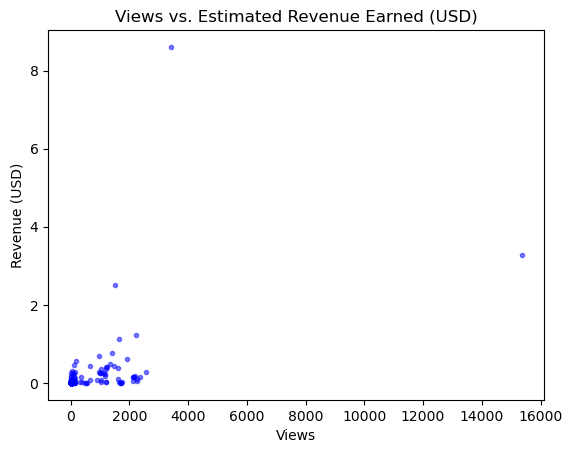

In [14]:
# plotting 'views' to 'revenue_usd'
plt.scatter(df.views, df.est_revenue_usd, marker= '.', alpha=0.5, color='blue')
plt.xlabel('Views')
plt.ylabel('Revenue (USD)')
plt.title('Views vs. Estimated Revenue Earned (USD)')
plt.show()

As we can see there doesn't seem to be a very strong correlation between views and revenue earned. We also notice there are three major outliers. We can take a look at which videos these are by sorting the data by 'est_revenue_usd'.

In [15]:
# creating a separate dataframe sorted by 'est_revenue_usd'
revenue = df.sort_values(['est_revenue_usd'], ascending=[False])
revenue[:10]

,video_title,views,avg_view_duration,ad_impressions,impressions,impressions_ctr,cpm_usd,rpm_usd,est_revenue_usd
1,Steps in the Street,3407.0,0:02:39,2882,30022,5.13,5.366,2.526,8.607
0,How Will the Metaverse Change the Way We Live ...,15355.0,0:00:18,11269,11108,0.41,0.530,0.214,3.287
21,Net Zero Speaks With Tina Grotzer,1506.0,0:00:46,1061,5268,1.25,4.287,1.663,2.505
6,Net Zero Speaks with Tschilidzi Marwala,2237.0,0:00:32,2041,6119,0.65,1.084,0.545,1.219
18,Net Zero Speaks with Gibson Kawago,1631.0,0:00:35,1191,3818,1.57,1.715,0.690,1.126
23,Net Zero Speaks with Thomas Minda,1420.0,0:00:33,1146,3650,1.53,1.236,0.549,0.779
40,How Does Regenerative Agriculture Tackle Clima...,966.0,0:00:31,725,3693,1.57,1.759,0.727,0.702
12,Net Zero Speaks with Thomas Schoos,1918.0,0:00:26,1721,10789,0.58,0.644,0.318,0.610
50,Kenya's Symphony,168.0,0:02:28,138,574,11.32,7.319,3.333,0.560
24,Flowers of Marrakech,1343.0,0:00:39,1164,1944,1.75,0.735,0.352,0.473


After sorting the data we can see that the highest earners since the start of 2023 is 'Steps in the Street', 'How Will the Metaverse Change the Way We Live', and 'Net Zero Speaks With Tina Grotzer'. The views for these videos aren't similar at all, but upon first glance one might assume there may be a correlation between 'est_revenue_usd' and 'impressions'. Let's plot it to find out.

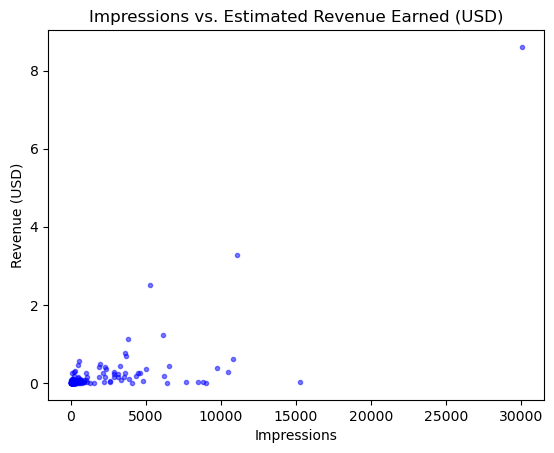

In [16]:
# plotting 'impressions' to 'est_revenue_usd'
plt.scatter(df.impressions, df.est_revenue_usd, marker= '.', alpha=0.5, color='blue')
plt.xlabel('Impressions')
plt.ylabel('Revenue (USD)')
plt.title('Impressions vs. Estimated Revenue Earned (USD)')
plt.show()

There doesn't seem to be a strong correlation between these variables either. Now let's check the correlation between 'ad_impressions' and 'est_revenue_usd'

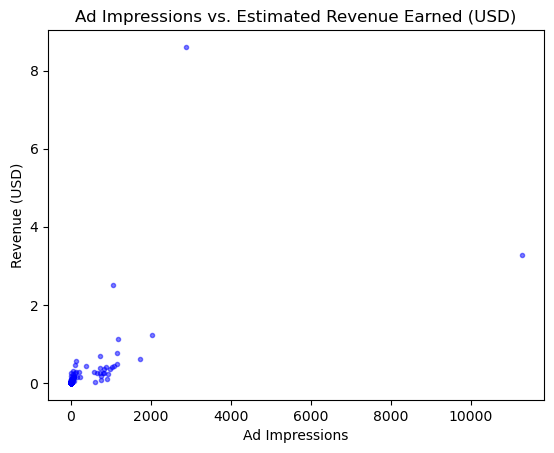

In [17]:
# plotting 'ad_impressions' to 'est_revenue_usd'
plt.scatter(df.ad_impressions, df.est_revenue_usd, marker= '.', alpha=0.5, color='blue')
plt.xlabel('Ad Impressions')
plt.ylabel('Revenue (USD)')
plt.title('Ad Impressions vs. Estimated Revenue Earned (USD)')
plt.show()

Looking at the plot above, we see a much stronger correlation between 'ad_impressions' and 'est_revenue_usd' compared to 'impressions' and 'est_revenue_usd'.

As the Content Analyst for Planet Classroom, I know that there is a major difference between 'ad_impressions' and 'impressions' and their impact on revenue earned. Ad impressions are defined as verified ad impressions that were served to users while impressions are defined as how many times the video thumbnail was shown to viewers. This includes only impressions on YouTube, not on external sites or apps. This distinction is important to understand because of their relationship between each other and other variables regarding their impact on revenue earned. We'll touch more on this later.

# CPM & RPM
CPM (cost per mile) is defined as the effective cost per mile, or the estimated average gross revenue per thousand served ad impressions. RPM (revenue per mile) is how much a creator makes off of those 1,000 views.

With ad impressions being verified ad impressions that were served to the users, and CPM being the average revenue per thousand ad impressions, we should expect to see a direct correlation between between 'cpm_usd' and 'rpm_usd'. Let's take a look.

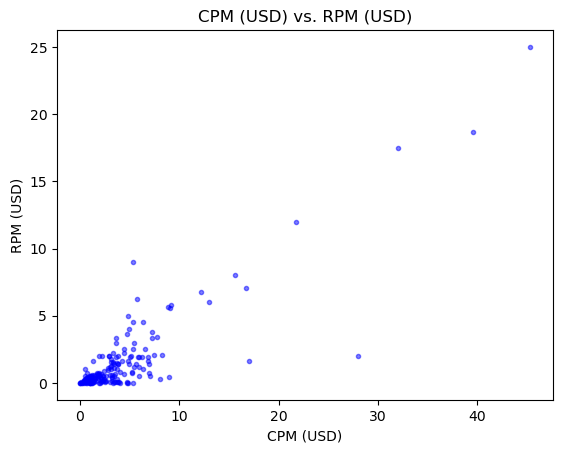

In [18]:
# plotting 'cpm_usd' to 'rpm_usd'
plt.scatter(df.cpm_usd, df.rpm_usd, marker= '.', alpha=0.5, color='blue')
plt.xlabel('CPM (USD)')
plt.ylabel('RPM (USD)')
plt.title('CPM (USD) vs. RPM (USD)')
plt.show()

As expected, there is an obvious positive correlation between CPM and RPM which makes sense being that, generally, the videos that advertisers choose to advertise on will generate more revenue than those videos that advertisers choose not to advertise on. However, as we have seen in the previous plots above, there isn't a specific way to tell which ones will perform better. Each video's performance is largely dependent on the content itself and how it's trending in general and within a specific population.

There are also some other factors to consider like the amount the advertiser is willing to pay for a specific video. For example, compared to 'How the Metaverse Will Change the Way We Live', 'Steps in the Street' has less views, but a higher CPM and thus a higher RPM and estimated revenue.

# Impressions & Click-Through Rate %
When considering which videos to promote (so as to capitalize on old content), we also want to take into account impressions and impression click-through rate percentage. Let's make dataframes for both to compare the two variables. First we'll make a dataframe from the click-through rate percentage.

In [19]:
# creating a separate dataframe sorted by 'impressions_ctr'
ctr = df.sort_values(['impressions_ctr'], ascending=[False])
ctr[:10]

,video_title,views,avg_view_duration,ad_impressions,impressions,impressions_ctr,cpm_usd,rpm_usd,est_revenue_usd
45,Net Zero #2 - Youth Monitor the Green Transiti...,514.0,0:01:23,3,8,62.50,5.333,0.018,0.009
53,Introducción a Planet Classroom: lanzamiento e...,143.0,0:00:15,5,765,18.56,1.200,0.021,0.003
50,Kenya's Symphony,168.0,0:02:28,138,574,11.32,7.319,3.333,0.560
59,Olivia's Birds,123.0,0:02:55,48,495,11.11,5.438,1.171,0.144
72,Isle de Jean Charles,72.0,0:04:07,52,171,10.53,3.173,1.292,0.093
142,Summer Days,14.0,0:03:29,3,138,10.14,0.333,0.071,0.001
99,R.V,31.0,0:08:37,22,268,10.07,3.773,1.452,0.045
134,"Quintet for Winds, Op. 52",15.0,0:03:26,15,142,9.86,0.867,0.467,0.007
67,Kids Who Save the World: Clean Air,97.0,0:01:31,24,407,9.83,5.292,0.722,0.070
82,Retain,47.0,0:02:46,5,296,9.46,0.400,0.021,0.001


When we look at the content with the highest click-through rate percentages, we see that this content doesn't necessarily have a large amount of views. As the Content Analyst, I am aware that the click-through rate percentage data is skewed because of different targeted marketing methods done in the past. Because of this it's more important that focus on the highest number of impressions first, followed by the click-through rate percentage. This way we can capitalize on our content we already know is being seen by users.

In [20]:
# creating a separate dataframe sorted by 'impressions'
impressions = df.sort_values(['impressions'], ascending=[False])
impressions[:10]

,video_title,views,avg_view_duration,ad_impressions,impressions,impressions_ctr,cpm_usd,rpm_usd,est_revenue_usd
1,Steps in the Street,3407.0,0:02:39,2882,30022,5.13,5.366,2.526,8.607
17,Net Zero Speaks with Karen Wang,1642.0,0:00:34,15,15267,0.88,0.667,0.008,0.013
0,How Will the Metaverse Change the Way We Live ...,15355.0,0:00:18,11269,11108,0.41,0.530,0.214,3.287
12,Net Zero Speaks with Thomas Schoos,1918.0,0:00:26,1721,10789,0.58,0.644,0.318,0.610
2,Ascent,2576.0,0:00:49,214,10487,2.61,2.379,0.113,0.292
19,Net Zero Speaks with John Paul Jose,1626.0,0:00:32,728,9737,0.74,0.922,0.228,0.370
16,What Technologies are Helping to Save Our Oceans?,1670.0,0:00:27,1,9003,1.17,1.000,0.001,0.001
26,Everything You Need to Know About Long Covid-19,1208.0,0:00:31,5,8794,1.73,4.800,0.012,0.014
75,We Are Rohingya,57.0,0:02:41,8,8479,0.52,7.125,0.544,0.031
29,How Can We Save the Amazon Rainforest?,1192.0,0:00:30,9,7669,1.97,3.333,0.014,0.017


Regarding revenue, looking at content with the highest impressions, regardless of the CPM, we want to be sure that, if possible, we place ads in the beginning of the video and/or within the average view duration to capitalize on each user's view. Although the CPM (and thus RPM) may not be very high, the thumbnails are being seen so there is a higher chance that these videos will viewed anyways.

# Separating CPM & RPM
When analyzing CPM and RPM, from a marketing perspective, we want to keep the two variables separate and treat them differently, but to remember that they are directly related. The more an advertiser pays to appear on a video (CPM), the more money you will make. While the CPM isn't reflective of the amount you will earn, it gives you a good idea of how valuable advertisers find your videos and audience for achieving their ROI and thus what they will pay for 1,000 views per video.

First let's look at the CPM.

In [21]:
# creating a separate dataframe sorted by 'cpm_usd'
cpm = df.sort_values(['cpm_usd'], ascending=[False])
cpm[:20]

,video_title,views,avg_view_duration,ad_impressions,impressions,impressions_ctr,cpm_usd,rpm_usd,est_revenue_usd
189,Fairy Tail,3.0,0:01:26,3,53,1.89,45.333,25.000,0.075
141,PIVOT: Paying It Forward,14.0,0:01:03,12,90,5.56,39.583,18.643,0.261
191,Visualizing change,2.0,0:00:14,2,52,3.85,32.000,17.500,0.035
101,Book Creator Writing Challenge,31.0,0:00:45,4,80,3.75,28.000,1.968,0.061
181,Swimming Upstream,4.0,0:04:46,4,50,2.00,21.750,12.000,0.048
170,How Can We Become More Inclusive?,6.0,0:00:33,1,172,3.49,17.000,1.667,0.010
108,Hero,26.0,0:02:37,20,254,2.76,16.700,7.077,0.184
147,What Would It Look Like,13.0,0:08:52,12,122,2.46,15.667,8.000,0.104
171,The Sun Will Save Us,6.0,0:01:31,5,196,2.55,13.000,6.000,0.036
183,Home Remedy,4.0,0:01:10,4,84,2.38,12.250,6.750,0.027


Now let's take a look at RPM.

In [22]:
# creating a separate dataframe sorted by 'rpm_usd'
rpm = df.sort_values(['rpm_usd'], ascending=[False])
rpm[:20]

,video_title,views,avg_view_duration,ad_impressions,impressions,impressions_ctr,cpm_usd,rpm_usd,est_revenue_usd
189,Fairy Tail,3.0,0:01:26,3,53,1.89,45.333,25.000,0.075
141,PIVOT: Paying It Forward,14.0,0:01:03,12,90,5.56,39.583,18.643,0.261
191,Visualizing change,2.0,0:00:14,2,52,3.85,32.000,17.500,0.035
181,Swimming Upstream,4.0,0:04:46,4,50,2.00,21.750,12.000,0.048
198,The Full Stop,1.0,0:00:07,3,43,2.33,5.333,9.000,0.009
147,What Would It Look Like,13.0,0:08:52,12,122,2.46,15.667,8.000,0.104
108,Hero,26.0,0:02:37,20,254,2.76,16.700,7.077,0.184
183,Home Remedy,4.0,0:01:10,4,84,2.38,12.250,6.750,0.027
185,A Thousand Suns,4.0,0:02:58,8,70,2.86,5.750,6.250,0.025
171,The Sun Will Save Us,6.0,0:01:31,5,196,2.55,13.000,6.000,0.036


When we compare the two dataframes, they look quite similar however there are some significant differences. For example in the 'cpm' dataframe we see that the 'Book Creator Writing Challenge' video has a CPM of 28.000. When we look at 'rpm' dataframe, this same video doesn't even make the list of the top 20 videos with the highest RPM. For reasons like this we want to focus on the RPM first.

# Considering Lifetime Data Performance
Now we'll take a quick look at lifetime analytics to get a better understanding of actual viewership and to see if we find any anomalies.

In [23]:
lifetime = pd.read_csv(r".\resources\lifetime.csv")

In [24]:
# dropping NaN values, reseting index, columns to lowercase and reformatted
lifetime = lifetime.dropna()
lifetime = lifetime.reset_index(drop=True)
lifetime.columns = lifetime.columns.str.lower()
lifetime.rename(columns={'video title':'video_title', 
                   'average view duration':'avg_view_duration', 
                   'ad impressions':'ad_impressions', 
                   'impressions click-through rate (%)':'impressions_ctr', 
                   'cpm (usd)':'cpm_usd',
                   'rpm (usd)':'rpm_usd', 
                   'estimated revenue (usd)':'est_revenue_usd'}, inplace=True)

# Views & Anomalies

In [25]:
lifetime[:20]

,video_title,views,avg_view_duration,ad_impressions,impressions,impressions_ctr,cpm_usd,rpm_usd,est_revenue_usd
0,We Are Rohingya,43033,0:01:30,535,1204324,2.03,1.226,0.008,0.361
1,How Will the Metaverse Change the Way We Live ...,41820,0:00:18,11269,13112,0.58,0.530,0.079,3.287
2,Steps in the Street,8086,0:02:32,5274,54263,6.23,5.729,2.079,16.777
3,The Autograph,5924,0:04:01,418,21702,14.28,0.911,0.035,0.210
4,Apples and Oranges,5488,0:05:13,103,20654,10.47,0.670,0.007,0.038
5,"Etude in B Minor, No. 10 Op. 25 - Chopin",5124,0:02:00,37,14947,2.25,2.649,0.011,0.054
6,Net Zero Speaks with Daniel Schrag,5034,0:00:50,120,16092,1.57,16.967,0.224,1.126
7,A Web Spun Tight with Polarization,4862,0:00:46,23,2546,0.47,2.435,0.011,0.054
8,The Search for Me,4427,0:00:47,34,268,3.36,6.029,0.031,0.135
9,Net Zero Speaks With Alexander Leicht,4423,0:00:28,37,18941,0.74,10.838,0.050,0.220


When we take at look at the lifetime data sorted by views, we see the top video is 'We Are Rohingya'. This video went viral relative to our average view count, but unfortunately this was before we became a YouTube Partner. It remains our most viewed video with the highest number of impressions, but underperforms in revenue.

As the Content Analyst, I also see something concerning:


*3 The Autograph | 5924 | 0:04:01 | 418 | 21702 | 14.28 | 0.911 | 0.035 | 0.210*

*4 Apples and Oranges | 5488 | 0:05:13 | 103 | 20654 | 10.47 | 0.670 | 0.007 | 0.038*


'The Autograph' and 'Apples and Oranges' had both been receiving regular views which benefit the channel and the channel's revenue, but both of these videos have been privated because of a previous decision made at an executive level. The privitization of these videos is unnecessary from my point of view and will be brought to management's attention. For a growing channel, every click counts.

# The Difference Between Ad Impressions and Impressions
As I mentioned earlier in the analysis, there is a difference between impressions and ad impressions as it relates to revenue earned. Impressions are simply the number of times a thumbnail has been viewed whereas ad impressions relates to verified ads served. Let's plot the two different variables against 'est_revenue_usd' using lifetime data to see the difference. We'll plot 'ad_impressions' first.

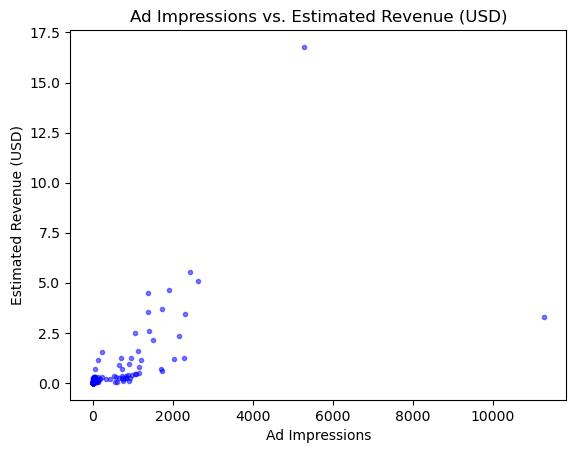

In [26]:
# plotting 'ad_impressions' to 'est_revenue_usd'
plt.scatter(lifetime.ad_impressions, lifetime.est_revenue_usd, marker= '.', alpha=0.5, color='blue')
plt.xlabel('Ad Impressions')
plt.ylabel('Estimated Revenue (USD)')
plt.title('Ad Impressions vs. Estimated Revenue (USD)')
plt.show()

As expected, there is a positive correlation between 'ad_impressions' and 'est_revenue_usd' with a couple of outliers. Again, ad impressions are different from impressions. In fact, if we look at the correlation between 'impressions' and 'est_revenue_usd' we can predict that we won't see any correlation at all.

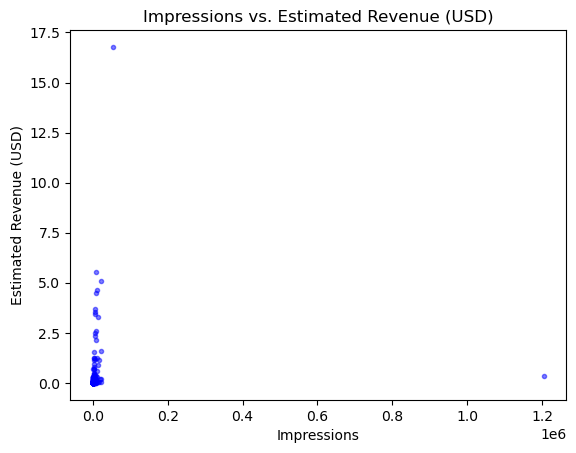

In [27]:
# plotting 'impressions' to 'est_revenue_usd'
plt.scatter(lifetime.impressions, lifetime.est_revenue_usd, marker= '.', alpha=0.5, color='blue')
plt.xlabel('Impressions')
plt.ylabel('Estimated Revenue (USD)')
plt.title('Impressions vs. Estimated Revenue (USD)')
plt.show()

As mentioned above, we will not typically see a correlation between impressions and revenue. This is because impressions are simply how often the thumbnail is viewed by users. Even if a thumbnail is view hundreds of thousands of times, without real views and significant CPM, we will fail to see any correlation with revenue.

# RPM & Revenue
Now let's sort the lifetime content by RPM.

In [28]:
# creating a separate lifetime dataframe sorted by 'rpm_usd'
lifetime_rpm = lifetime.sort_values(['rpm_usd'], ascending=[False])
lifetime_rpm[:20]

,video_title,views,avg_view_duration,ad_impressions,impressions,impressions_ctr,cpm_usd,rpm_usd,est_revenue_usd
167,Retain,1009,0:02:06,1378,7393,1.19,5.912,4.443,4.483
176,What Do You Know About Microgrids?,996,0:01:33,1724,5758,2.99,3.893,3.710,3.695
122,Net Zero Speaks with Hu Jiaojiao,1266,0:03:37,1898,11230,0.77,4.439,3.662,4.636
53,Net Zero Speaks with Udit Singhal,1818,0:01:58,2436,8242,1.80,4.149,3.062,5.563
54,Net Zero Speaks with Justin Jeong,1778,0:02:09,2634,22763,0.61,3.516,2.866,5.096
106,Kenya's Symphony,1312,0:02:16,1370,4709,3.55,4.686,2.711,3.549
107,Faculty Concert Brahms Trio,1306,0:01:57,2308,5476,2.54,2.698,2.628,3.427
186,Dear Mrs. President,933,0:01:54,2143,5265,2.09,1.978,2.502,2.334
2,Steps in the Street,8086,0:02:32,5274,54263,6.23,5.729,2.079,16.777
214,Reflections,706,0:01:43,2278,2591,1.39,0.978,1.738,1.227


When we sort by RPM for the lifetime data, we see vastly different results than what we saw with the more current data which was presented earlier in this analysis. This is because it's taking the average for a much longer amount of time. Ultimately, this means more views and more fluctuation in CPM/RPM.

In [29]:
# creating a separate lifetime dataframe sorted by 'est_revenue_usd'
lifetime_rev = lifetime.sort_values(['est_revenue_usd'], ascending=[False])
lifetime_rev[:20]

,video_title,views,avg_view_duration,ad_impressions,impressions,impressions_ctr,cpm_usd,rpm_usd,est_revenue_usd
2,Steps in the Street,8086,0:02:32,5274,54263,6.23,5.729,2.079,16.777
53,Net Zero Speaks with Udit Singhal,1818,0:01:58,2436,8242,1.80,4.149,3.062,5.563
54,Net Zero Speaks with Justin Jeong,1778,0:02:09,2634,22763,0.61,3.516,2.866,5.096
122,Net Zero Speaks with Hu Jiaojiao,1266,0:03:37,1898,11230,0.77,4.439,3.662,4.636
167,Retain,1009,0:02:06,1378,7393,1.19,5.912,4.443,4.483
176,What Do You Know About Microgrids?,996,0:01:33,1724,5758,2.99,3.893,3.710,3.695
106,Kenya's Symphony,1312,0:02:16,1370,4709,3.55,4.686,2.711,3.549
107,Faculty Concert Brahms Trio,1306,0:01:57,2308,5476,2.54,2.698,2.628,3.427
1,How Will the Metaverse Change the Way We Live ...,41820,0:00:18,11269,13112,0.58,0.530,0.079,3.287
46,Net Zero Speaks With Sophia Kianni,1862,0:01:36,1412,9035,2.05,3.326,1.389,2.586


Again, this is why the focus should be promoting videos with higher RPM. RPM has an almost direct correlation with revenue as we can see in the plot below.

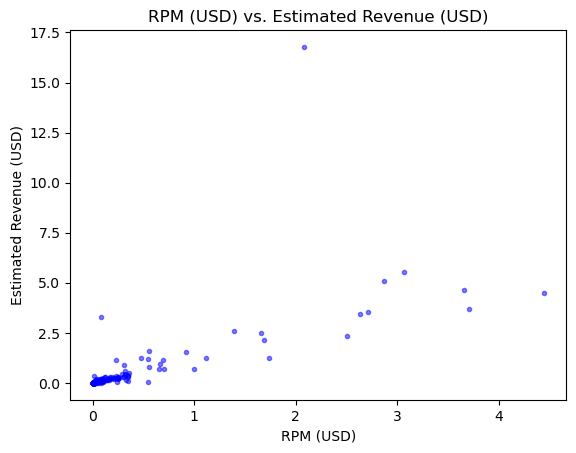

In [30]:
# plotting 'ad_impressions' to 'est_revenue_usd' using lifetime data
plt.scatter(lifetime.rpm_usd, lifetime.est_revenue_usd, marker= '.', alpha=0.5, color='blue')
plt.xlabel('RPM (USD)')
plt.ylabel('Estimated Revenue (USD)')
plt.title('RPM (USD) vs. Estimated Revenue (USD)')
plt.show()

In conclusion, we want to continue promoting videos which we know get regular views even without the highest RPM, such as 'Steps in the Street', and also focus on promoting videos *with* high RPM like 'Fairy Tail'. CPM and RPM are influenced by a number of factors and fluctuate regularly. When considering CPM and RPM, we would want to use more recent data as opposed to lifetime data to capitalize on what the advertiser is willing to pay in the present as opposed to an average of the past.

As the Content Analyst, I know that the videos with the highest RPM aren't necessarily recent videos, but there's no reason *not* to promote them. Old content doesn't have to equal dead content. This is especially true as of recently because YouTube brought back sorting of a creator's videos from oldest to newest, a function that was previously taken away from the users which ultimately harmed creators.

This brief analysis focuses on two different timespans regarding specific variables like views, CPM, RPM, and ad impressions. It's important to remember that there are other factors that influence this data that should be looked at both separately and parallel to this data. This would include audience retention, geographical data, age range, and viewer age. When considering promotional and marketing strategies, it's critical that this data is aligned with an analysis like the one above to ensure the proper audience is being targeted at the correct time to capitalize on content as effectively as possible.

*(end)*